In [1]:
#make sure fastai is up to date 
!curl -s https://course19.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [2]:
#read in standard data science libs
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import pathlib

In [3]:
#import google drive package
from  google.colab import drive

In [12]:
# install fastbook
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 7.5MB/s 
     |████████████████████████████████| 51kB 8.3MB/s 
     |████████████████████████████████| 1.2MB 15.9MB/s 
     |████████████████████████████████| 12.8MB 30.7MB/s 
     |████████████████████████████████| 776.8MB 24kB/s 
     |████████████████████████████████| 51kB 8.3MB/s 
Mounted at /content/gdrive


In [13]:

from fastbook import *
from fastai.vision import *

In [14]:
# connect workbook to google drive folder to access images 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [16]:
#save path to project folder 
root_path = 'gdrive/My Drive/AI_Projects/'

In [17]:
# uncomment to make balls folder 
#(pathlib.Path(root_path)/'Cosmetics').mkdir(parents=True, exist_ok=True)

In [18]:
#save path for balls folder that contains images and variable tags 
proj_path = 'gdrive/My Drive/AI_Projects/Cosmetics/'

In [19]:
#make folder names 
folders = ['blush','eyeliner','eyebrow','eyeshadow','foundation','lipstic','mascara','contour']

In [20]:
#create all folders in /Cosmetics
#for i in folders:
#  path = pathlib.Path(proj_path)
#  dest = (path/i).mkdir(parents=True, exist_ok=True)

In [21]:
#save fastai path 
p_path = pathlib.Path(proj_path)

In [22]:
# create image data bunch with 80/20 train test split 
np.random.seed(42)
data = ImageDataLoaders.from_folder(p_path, train=".", valid_pct=0.2,
        item_tfms=Resize(size=224),batch_tfms=[*aug_transforms(size=224),Normalize.from_stats(*imagenet_stats)])

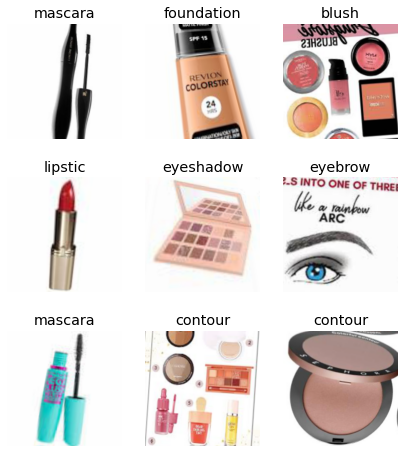

In [23]:
#show sample of images 
data.show_batch(nrows=3,figsize=(7,8))

In [24]:
data.vocab, data.c, len(data.train_ds),len(data.valid_ds)

(['blush', 'contour', 'eyebrow', 'eyeliner', 'eyeshadow', 'foundation', 'lipstic', 'mascara'],
 8,
 414,
 103)

In [25]:
#create Convolutional Neural Net object
# use resnet 34 for transfer learning 
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [26]:
# train 8 epochs(number of iteration) of the model 
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,3.214421,3.744889,0.844660,01:01
1,2.805788,1.716479,0.592233,00:03
2,2.246008,1.262602,0.378641,00:03
3,1.902094,1.086623,0.320388,00:03
4,1.617835,1.007989,0.320388,00:03
5,1.429757,0.987109,0.339806,00:03
6,1.289529,0.986929,0.330097,00:03
7,1.176358,0.987735,0.320388,00:03


In [27]:
#save model
learn.save('model1_34', with_opt=True)

Path('gdrive/My Drive/AI_Projects/Cosmetics/models/model1_34.pth')

In [28]:
# unfreeze model. Lets you train earlier layers 
learn.unfreeze()

<bound method Recorder.plot_lr_find of Recorder>

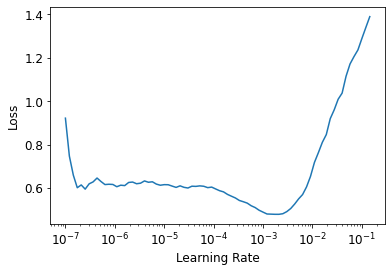

In [29]:
#find optimal learning rates 
learn.lr_find()
learn.recorder.plot_lr_find

In [30]:
# fit whole model with new learning rates 
learn.fit_one_cycle(2, lr_max = slice(1e-6,1e-6),wd = 0.01)

epoch,train_loss,valid_loss,error_rate,time
0,0.615460,0.990284,0.330097,00:04
1,0.621912,0.986163,0.339806,00:04


<bound method Recorder.plot_lr_find of Recorder>

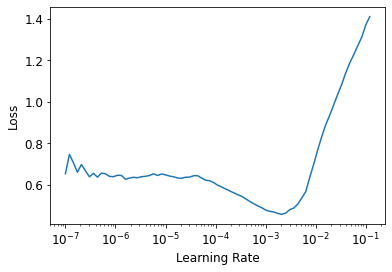

In [31]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot_lr_find

In [32]:
#save model
learn.save('model2_34', with_opt=True)

Path('gdrive/My Drive/AI_Projects/Cosmetics/models/model2_34.pth')

I wanted to see if the new learning rate can improve the model, but it seems like there is not much improvement. So I'm gonna use first model I saved.

In [33]:
learn.load('model1_34')
interp = ClassificationInterpretation.from_learner(learn)

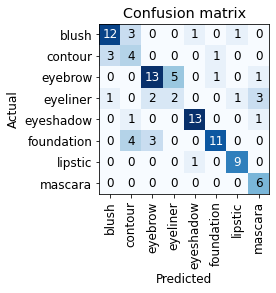

In [34]:
#plot results of model on validation set 
interp.plot_confusion_matrix()

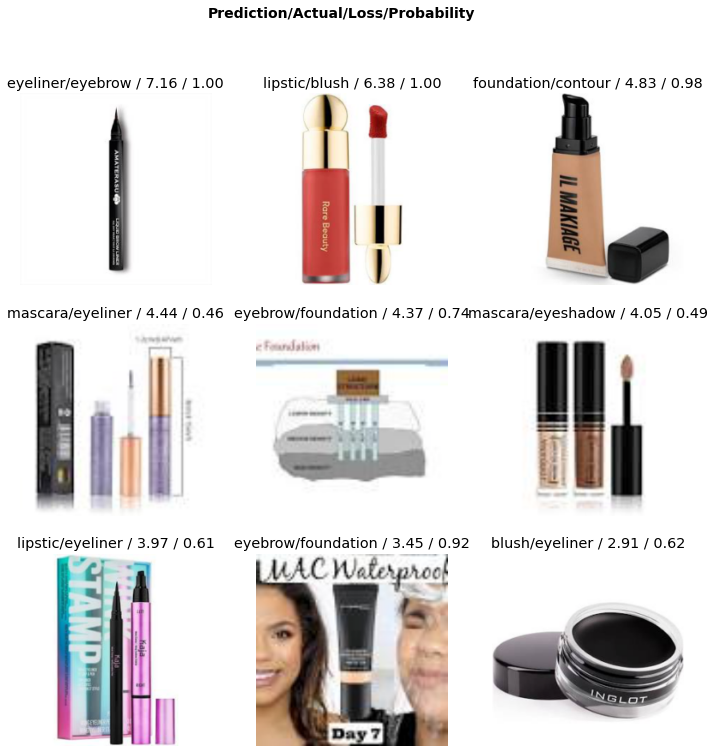

In [35]:
# plot top losses (most wrong)
interp.plot_top_losses(9, figsize=(12,12))

### Will it actually predict the class?

I want to see if this model can predict with the new image. So I tried two image prediction with the moel

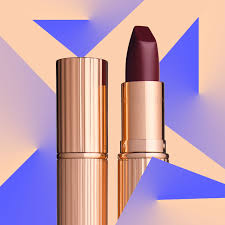

In [44]:
img_lipstic= load_image(Path(root_path)/'Cosmetics_Valid'/'lipstic.jpg')
img_lipstic

In [45]:
pred_class,pred_idx,outputs= learn.predict(Path(root_path)/'Cosmetics_Valid'/'lipstic.jpg')
pred_class

'lipstic'

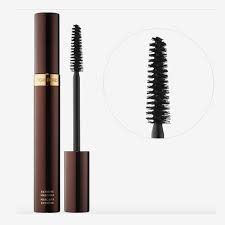

In [46]:
img_mascara= load_image(Path(root_path)/'Cosmetics_Valid'/'Mascara.jpg')
img_mascara

In [47]:
pred_class,pred_idx,outputs= learn.predict(Path(root_path)/'Cosmetics_Valid'/'Mascara.jpg')
pred_class

'mascara'